## Creacion de funcion XOR

Ejercicio en clase

In [3]:
def not_custom(x):
    parametros = [-1 , 1]
    return int(x * parametros[0] + parametros[1]>0)


In [4]:
test = 0
not_custom(test)

1

In [5]:
def or_custom(x1,x2):
    parametros = [1,1,0]
    
    return int(x1*parametros[0] + x2 * parametros[1] + parametros[2] >0) 

In [34]:
test1 = 0
test2 = 0
or_custom(test1,test2)

0

In [35]:
def and_custom(x1,x2):
    #otra opcion podria ser:
    # parametros = [1,1,-1]    
    # y compara que sea mayor a 0
    parametros = [1,1,0]
    
    return int(x1*parametros[0] + x2 * parametros[1] + parametros[2] >1) 

In [36]:
test1 = 1
test2 = 0
and_custom(test1,test2)

0

<img src="xor.PNG" width="500px">

In [9]:
def xor_custom(x1,x2):
    and1 = and_custom(x1,x2)
    or1 = or_custom(x1,x2)
    
    nand1 = not_custom(and1)
    
    salida = and_custom(nand1,or1)
    return salida

In [10]:
test1 = 0
test2 = 1
xor_custom(test1,test2)

1

# Parte 1
## XOR Vectorizado

**Ejercicio de composición de funciones para XOR**

In [11]:
import numpy as np

In [38]:
def vnot_1(x):
    b = np.ones(x.shape)
    b = np.vstack((x,b)).astype(int)
    a = np.array([[-1,1]])
    c = np.matmul(a,b)
    return c

In [39]:
def vnot(x):
    return (x == 0).astype(int)

In [40]:
test = np.array([1,0,1,0,0,0,0,1,1,1,])
print(vnot_1(test))
print(vnot(test))

[[0 1 0 1 1 1 1 0 0 0]]
[0 1 0 1 1 1 1 0 0 0]


In [41]:
def vand(x1, x2):
    return np.int_((x1 + x2)> 1)

In [42]:
test1= np.array([1,1,0,0])
test2= np.array([0,1,0,1])

vand(test1, test2)


array([0, 1, 0, 0])

In [43]:
def vor(x1,x2):
    return np.int_((x1 + x2)>= 1)
    

In [44]:
test1= np.array([1,1,0,0])
test2= np.array([0,1,0,1])

vor(test1, test2)


array([1, 1, 0, 1])

In [45]:
def vxor(x1,x2):
    and1 = vand(x1,x2)
    or1 = vor(x1,x2)
    
    nand1 = vnot(and1)
    salida = vand(nand1,or1)
    return salida

In [46]:
test1= np.array([1,1,0,0])
test2= np.array([0,1,0,1])

vxor(test1, test2)


array([1, 0, 0, 1])

# Parte 2

## Perceptron AND

In [47]:
def per_and(a,b):
    w1 = np.array([1,1])

    c = np.vstack((a,b)) 
    # operacion wx + b
    result = np.matmul(w1,c)
    
    # Funcion step
    result = result > 1
    return result.astype(int)

In [48]:
test1= np.array([1,1,0,0])
test2= np.array([0,1,0,1])

per_and(test1, test2)

array([0, 1, 0, 0])

## Perceptron OR

In [49]:
def per_or(a,b):
    w1 = np.array([1,1])

    c = np.vstack((a,b)) 
    # operacion wx + b
    result = np.matmul(w1,c)
    
    # Funcion step
    result = result >= 1
    return result.astype(int)

In [50]:
test1= np.array([1,1,0,0])
test2= np.array([0,1,0,1])

per_or(test1, test2)

array([1, 1, 0, 1])

### Remplazar las funciones de la parte 1 con los perceptrones entrenados.

In [51]:
def per_xor(x1,x2):
    and1 = per_and(x1,x2)
    or1 = per_or(x1,x2)
    
    nand1 = vnot(and1)
    salida = per_and(nand1,or1)
    return salida

In [52]:
test1= np.array([1,1,0,0])
test2= np.array([0,1,0,1])

per_xor(test1, test2)

array([1, 0, 0, 1])

#### Representacion grafica de datos intermedios

Representacion grafica de los datos xor

In [28]:
import matplotlib.pyplot as plt
import seaborn as sb

In [31]:
x1= np.array([1,1,0,0])
x2= np.array([0,1,0,1])

and1 = per_and(x1,x2)
or1 = per_or(x1,x2)
nand1 = vnot(and1)
xor_f = per_and(nand1,or1)

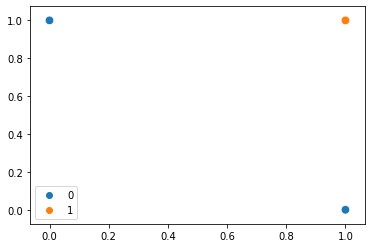

In [32]:
ax = sb.scatterplot(x=nand1, y=or1,s=75, hue=xor_f)

### Conclusiones

El resultado concuerda exactamente con lo discutido en clase, que la capa intermedia crea un plano de separacion lineal de los datos; esto proboca un reduccion en la complejidad inical que puedan tener los mismos.  

En el caso de que sean muy complejos los datos es necesario contar con varias 'neuronas' para que similar a un ensable funcion; entre todas logren resolver una aproximazion ideal de la solucion.

### Adicional

Determinar el numero de parametros entrenables (pesos) de cada uno de los siguientes modelos

<img src='pesos1.png' width='200px'>
Pesos = 3, sin sesgo

<img src='pesos2.png' width='300px'>
Pesos = 3, con sesgo

<img src='pesos3.png' width='200px'>
Pesos = 12, sin sesgo

<img src='pesos4.png' width='200px'>
Pesos = 6, sin sesgo

<img src='pesos5.png' width='200px'>
Pesos = 10, sin sesgo y considerando que no es fully connected

<img src='pesos6.png' width='200px'>
Pesos = 20, sin sesgo